# Wrangle and Analyze Data
## By: Osama Taha

## About the DataSet "We Rate Dogs"
It is a tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## Key Points
1. You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
2. Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to **assess and clean at least 8 quality issues and at least 2 tidiness issues** in this dataset.
3. Cleaning includes merging individual pieces of data according to the rules of tidy data.
4. The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
5. You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Initial Cleaning Requirements
1. Remove any retweets.
2. remove any records beyond August 1st, 2017 (Optional).

## The Steps I'm going to follow:

**1. Data Wrangling:**

    A. Gather Data.    
    B. Copy Raw Data (to Work on the copy not the original data).   
    C. Assess Data.   
    D. Clean Data.
    E. Store Cleaned Data.
    
    
**2. Data Analyzing & Visualizing.**

# 1. Data Wrangling
## A. Gather Data

In [1]:
# Import all the needed libraries:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline 

import os 
import glob 
import requests
import tweepy
from bs4 import BeautifulSoup as bs

In [2]:
# Importing the first table "Twitter Archive" which is already downloaded:
df_archive_raw = pd.read_csv('Data/twitter-archive-enhanced.csv')

# I used a "relative path" to the file just for make the folder organized.
# REF [https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/]

df_archive_raw.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [3]:
# Download the second table "images predections" programatically:
folder_name = 'Data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
print(response)
with open(os.path.join(folder_name, url.split('/')[-1]) , mode='wb') as file:
        file.write(response.content)
print(os.listdir(folder_name))
df_images_raw = pd.read_csv('Data/image-predictions.tsv', sep= '\t')
df_images_raw.head()

<Response [200]>
['image-predictions.tsv', 'tweet-json.txt', 'twitter-archive-enhanced.csv']


tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [4]:
# Importing the third table "Twitter JSON" which is already downloaded:
df_json_raw = pd.read_json("Data/tweet-json.txt", lines = True)
#REF [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html]

df_json_raw.head()

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   
3  This is Darla. She commenced a snooze mid meal...      False   
4  This is Franklin. He would like you to stop ca...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   
3  {'media': [{'id': 891689552724799489, 'id_str'...   
4  {'media': [{'id': 891327551943041024, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorite_count  favorited  retweeted possibly_sensitive  \
0  ...           39467      False      False                0.0   
1  ...           33819      False      False                0.0   
2  ...           25461      False      False                0.0   
3  ...           42908      False      False                0.0   
4  ...           41048      False      False                0.0   

  possibly_sensitive_appealable  lang  retweeted_status quoted_status_id  \
0                           0.0    en               NaN              NaN   
1                           0.0    en               NaN              NaN   
2                           0.0    en               NaN              NaN   
3                           0.0    en               NaN              NaN   
4                           0.0    en               NaN              NaN   

   quoted_status_id_str  quoted_status  
0                   NaN            NaN  
1                   NaN            NaN  
2                   NaN            NaN  
3                   NaN            NaN  
4                   NaN            NaN  

[5 rows x 31 columns]

## B. Copy Raw Data
To Work on the copy not the original data

In [5]:
df_archive = df_archive_raw.copy()
df_images = df_images_raw.copy()
df_json = df_json_raw.copy()

## C. Assess Data

### Tidiness Issues (All Visually)

**1. All Tables:**
* Must be merged to one big table to be easy to analyze later.

**2. "twitter-archive-enhanced" Table:**
* We shall merge all dog age categories (doggo, floofer, pupper, puppo) into one column (one variable).


### Quality Issues


### "Twitter Archive" Table

In [6]:
df_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
84    876484053909872640                    NaN                  NaN   
675   789530877013393408                    NaN                  NaN   
1973  673213039743795200                    NaN                  NaN   
1777  677918531514703872                    NaN                  NaN   
945   752660715232722944                    NaN                  NaN   

                      timestamp  \
84    2017-06-18 16:57:37 +0000   
675   2016-10-21 18:16:44 +0000   
1973  2015-12-05 18:51:11 +0000   
1777  2015-12-18 18:29:07 +0000   
945   2016-07-12 00:27:52 +0000   

                                                 source  \
84    <a href="http://twitter.com/download/iphone" r...   
675   <a href="http://twitter.com/download/iphone" r...   
1973  <a href="http://twitter.com/download/iphone" r...   
1777  <a href="http://twitter.com/download/iphone" r...   
945   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
84    This is Benedict. He wants to thank you for th...                  NaN   
675   This is Rizzy. She smiles a lot. 12/10 contagi...                  NaN   
1973  This is Dexter. He just got some big news. 10/...                  NaN   
1777  "Everything looks pretty good in there. Make s...                  NaN   
945   Hooman used Pokeball\n*wiggle*\n*wiggle*\nDogg...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
84                         NaN                        NaN   
675                        NaN                        NaN   
1973                       NaN                        NaN   
1777                       NaN                        NaN   
945                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
84    https://twitter.com/dog_rates/status/876484053...                13   
675   https://twitter.com/dog_rates/status/789530877...                12   
1973  https://twitter.com/dog_rates/status/673213039...                10   
1777  https://twitter.com/dog_rates/status/677918531...                10   
945   https://twitter.com/dog_rates/status/752660715...                10   

      rating_denominator      name  doggo floofer pupper puppo  
84                    10  Benedict   None    None   None  None  
675                   10     Rizzy   None    None   None  None  
1973                  10    Dexter   None    None   None  None  
1777                  10      None   None    None   None  None  
945                   10      None  doggo    None   None  None

In [7]:
df_archive.duplicated().any()   # No duplicated records found.

False

In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Jordy        1
Staniel      1
Jimbo        1
Odin         1
Herb         1
Name: name, Length: 957, dtype: int64

In [10]:
df_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

* The data type of "tweet_id" needs to be converted to Object instead of int.
* The number of non-null values of "in_reply_to_status_id" & "in_reply_to_user_id" are very low (unreliable for analysis) so those columns shall be dropped.
* The data type of "timestamp" needs to be converted to datetime instead of object.
* After removing retweets (initial requirement), we need to drop the columns "retweeted_status_id", "retweeted_status_user_id" & "retweeted_status_timestamp".
* Many irrelevent names of dogs for example:'a', 'an' & 'the'.

### "Images Predections" Table

In [11]:
df_images.sample(5)

tweet_id                                          jpg_url  \
788   690400367696297985  https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg   
932   703268521220972544  https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg   
1287  751132876104687617  https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg   
842   695051054296211456  https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg   
958   705475953783398401  https://pbs.twimg.com/media/CcpaoR9WAAAKlJJ.jpg   

      img_num                  p1   p1_conf  p1_dog                        p2  \
788         1            Pembroke  0.426459    True                  papillon   
932         1                wool  0.525434   False                  fur_coat   
1287        1  Labrador_retriever  0.929390    True  Chesapeake_Bay_retriever   
842         1         Boston_bull  0.761454    True                       pug   
958         1    golden_retriever  0.908784    True        Labrador_retriever   

       p2_conf  p2_dog                 p3   p3_conf  p3_dog  
788   0.317368    True  Shetland_sheepdog  0.077616    True  
932   0.236391   False             kuvasz  0.038243    True  
1287  0.038254    True   golden_retriever  0.007610    True  
842   0.075395    True          Chihuahua  0.041598    True  
958   0.030361    True        tennis_ball  0.004996   False

* Some values in "p1" , "p2" & "p3" are sometimes written as lowercase and sometimes camelcase (need to be unified as camelcase).

In [12]:
df_images.duplicated().any()   # No duplicated records found.

False

In [13]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* The data type of "tweet_id" needs to be converted to Object instead of int.

### "Twitter JSON" Table

In [14]:
df_json.sample(5)

created_at                  id              id_str  \
1316 2016-03-06 17:52:42+00:00  706538006853918722  706538006853918720   
1366 2016-02-24 17:04:07+00:00  702539513671897089  702539513671897088   
1874 2015-12-11 00:35:44+00:00  675111688094527488  675111688094527488   
1149 2016-04-29 00:21:01+00:00  725842289046749185  725842289046749184   
1269 2016-03-14 16:02:49+00:00  709409458133323776  709409458133323776   

                                              full_text  truncated  \
1316  This is Oliver (pronounced "Ricardo"). He's a ...      False   
1366  This is a Wild Tuscan Poofwiggle. Careful not ...      False   
1874  Say hello to Oliver. He thought what was insid...      False   
1149  This is Colby. He's currently regretting all t...      False   
1269  This is Billy. He sensed a squirrel. 8/10 damn...      False   

     display_text_range                                           entities  \
1316           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1366           [0, 136]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1874           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1149           [0, 101]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1269            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
1316  {'media': [{'id': 706537990542254082, 'id_str'...   
1366  {'media': [{'id': 702539494201782274, 'id_str'...   
1874  {'media': [{'id': 675111682683875329, 'id_str'...   
1149  {'media': [{'id': 725842282449125380, 'id_str'...   
1269  {'media': [{'id': 709409441024581632, 'id_str'...   

                                                 source  \
1316  <a href="http://twitter.com/download/iphone" r...   
1366  <a href="http://twitter.com/download/iphone" r...   
1874  <a href="http://twitter.com/download/iphone" r...   
1149  <a href="http://twitter.com/download/iphone" r...   
1269  <a href="http://twitter.com/download/iphone" r...   

      in_reply_to_status_id  ...  favorite_count  favorited  retweeted  \
1316                    NaN  ...            3778      False      False   
1366                    NaN  ...            3134      False      False   
1874                    NaN  ...            1042      False      False   
1149                    NaN  ...            7691      False      False   
1269                    NaN  ...            2855      False      False   

     possibly_sensitive possibly_sensitive_appealable  lang  retweeted_status  \
1316                0.0                           0.0    en               NaN   
1366                0.0                           0.0    en               NaN   
1874                0.0                           0.0    en               NaN   
1149                0.0                           0.0    en               NaN   
1269                0.0                           0.0    en               NaN   

     quoted_status_id  quoted_status_id_str  quoted_status  
1316              NaN                   NaN            NaN  
1366              NaN                   NaN            NaN  
1874              NaN                   NaN            NaN  
1149              NaN                   NaN            NaN  
1269              NaN                   NaN            NaN  

[5 rows x 31 columns]

* The column "id_str" contains the same data of the column "id" so it can be dropped.

In [15]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

* the data type of "id" must be converted to object.
* Those columns contain very low number of non-null values so it is better to drop them (in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status).

## Assess Data - Summary
1. Visual Assessing in Tidiness Issues using Excel was much better than Jupyter Notebook except for JSON.txt files.
2. I found the following issues:

    A. Tidiness Issues (All visually):

        1. All Tables:
            * Must be merged to one big table to be easy to analyze later.

        2. "twitter-archive-enhanced" Table:
            * We shall merge all dog age categories (doggo, floofer, pupper, puppo) into one column (one variable).
        
    B. Quality Issues
    
        1. "Twitter Archive" Table:
            * The data type of "tweet_id" needs to be converted to Object instead of int.
            * The number of non-null values of "in_reply_to_status_id" & "in_reply_to_user_id" are very low (unreliable for                                                                    analysis) so those columns shall be dropped.
            * The data type of "timestamp" needs to be converted to datetime instead of object.
            * After removing retweets (initial requirement), we need to drop the columns "retweeted_status_id",                                     "retweeted_status_user_id" & "retweeted_status_timestamp".
            * Many irrelevent names of dogs for example:'a', 'an' & 'the'.
            


 
         2. "Images Predections" Table:
            *Some values in "p1" , "p2" & "p3" are sometimes written as lowercase and sometimes camelcase (need to be unified as camelcase).
            * The data type of "tweet_id"  needs to be converted to Object instead of int.
        
        
        3. "Twitter JSON" Table:
            * The column "id_str" contains the same data of the column "id" so it can be dropped.
            * the data type of "id" must be converted to object.
            * Those columns contain very low number of non-null values so it is better to drop them (in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status).
            

## D. Clean Data


### Quality Issues
#### 1. "Twitter Archive" Table:


### Define:

* Convert the data type of "tweet_id" to be Object instead of int.

### Code:

In [16]:
df_archive.tweet_id = df_archive.tweet_id.astype(object)

### Test:

In [17]:
df_archive.tweet_id.dtypes

dtype('O')

* The data type of "tweet_id" is now (Object)

### Define:

* The number of non-null values of "in_reply_to_status_id" & "in_reply_to_user_id" are very low (unreliable for analysis) so those columns shall be dropped.

### Code:

In [18]:
drop_values=['in_reply_to_status_id','in_reply_to_user_id']

for value in drop_values:

    df_archive.drop(value, axis=1, inplace= True)

### Test:

In [19]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2297 non-null   object 
 8   rating_numerator            2356 non-null   int64  
 9   rating_denominator          2356 non-null   int64  
 10  name                        2356 non-null   object 
 11  doggo                       2356 non-null   object 
 12  floofer                     2356 non-null   object 
 13  pupper                      2356 

* Both columns are deleted now.

### Define:

* Change the data type of "timestamp" to datetime instead of object.

### Code:

In [20]:
df_archive['timestamp']= pd.to_datetime(df_archive['timestamp']) 

### Test:

In [21]:
df_archive.timestamp.dtypes

datetime64[ns, UTC]

* The data type of "timestamp" is now datetime.

### Define:

* After removing retweets (initial requirement), we need to drop the columns "retweeted_status_id", "retweeted_status_user_id" & "retweeted_status_timestamp".

### Code:

In [22]:
# Removing the retweets:
print('The number of rows before action : ' , df_archive.shape[0])
print('The number of retweets before action : ' , df_archive.retweeted_status_id.count())
df_archive.drop(df_archive.loc[df_archive.retweeted_status_id > 0 ].index, inplace=True)

#REF [https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/]

The number of rows before action :  2356
The number of retweets before action :  181


### Test:

In [23]:
print('The number of rows after action : ' , df_archive.shape[0])
print('The number of retweets after action : ' , df_archive.retweeted_status_id.count())

The number of rows after action :  2175
The number of retweets after action :  0


* Retweets are now deleted.

### Code:

In [24]:
# dropping the unused columns:
print('The number of Columns before action : ' , df_archive.shape[1])
drop_values=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']

for value in drop_values:

    df_archive.drop(value, axis=1, inplace= True)

The number of Columns before action :  15


### Test:

In [25]:
print('The number of Columns after action : ' , df_archive.shape[1])
df_archive.info()

The number of Columns after action :  12
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object            

* Columns are now dropped.

### Define:

*Delete many irrelevent names of dogs for example:'a', 'an' & 'the'.

### Code:

In [26]:
df_archive.drop(df_archive[df_archive['name'] == 'a'].index, inplace = True)
df_archive.drop(df_archive[df_archive['name'] == 'an'].index, inplace = True)
df_archive.drop(df_archive[df_archive['name'] == 'the'].index, inplace = True)

### Test:

In [27]:
df_archive.name.value_counts()

None       680
Charlie     11
Lucy        11
Oliver      10
Cooper      10
          ... 
Simba        1
Spark        1
Eazy         1
Jareld       1
Sierra       1
Name: name, Length: 953, dtype: int64

* Irrelevant names are now deleted.

### 2. "Images Predections" Table:

### Define:

* convert the values in "p1" , "p2" & "p3" to camelcase.
            

### Code:

In [28]:
drop_values=['p1','p2','p3']

for value in drop_values:

    df_images[value]= df_images[value].str.title()

#REF [https://www.geeksforgeeks.org/python-pandas-series-str-lower-upper-and-title/]

### Test:

In [29]:
df_images.sample(20)

tweet_id                                            jpg_url  \
546   677328882937298944    https://pbs.twimg.com/media/CWZbBlAUsAAjRg5.jpg   
560   677716515794329600    https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg   
489   675522403582218240    https://pbs.twimg.com/media/CV_wCh8W4AEWWZ9.jpg   
1156  733460102733135873    https://pbs.twimg.com/media/Ci3GDeyUoAAKOxn.jpg   
73    667369227918143488    https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg   
989   707969809498152960    https://pbs.twimg.com/media/CdM2xRpXEAUsR4k.jpg   
1959  865718153858494464    https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg   
1854  841077006473256960    https://pbs.twimg.com/media/C6wbE5bXUAAh1Hv.jpg   
1475  780476555013349377  https://pbs.twimg.com/tweet_video_thumb/CtTFZZ...   
699   684594889858887680    https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg   
2002  876838120628539392    https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg   
1051  713919462244790272    https://pbs.twimg.com/media/CehZ9mLWsAAsn28.jpg   
565   678278586130948096    https://pbs.twimg.com/media/CWm6xySUEAAqfFU.jpg   
806   691820333922455552    https://pbs.twimg.com/media/CZnW7JGW0AA83mn.jpg   
1025  710658690886586372    https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg   
1323  756651752796094464    https://pbs.twimg.com/media/CoAqwPTW8AAiJlz.jpg   
1674  813142292504645637    https://pbs.twimg.com/media/C0jcmOKVQAAd0VR.jpg   
1088  718971898235854848    https://pbs.twimg.com/media/CfpNGTHUIAAA8XC.jpg   
1879  846514051647705089    https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg   
994   708130923141795840    https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg   

      img_num                           p1   p1_conf  p1_dog  \
546         1                Water_Buffalo  0.424250   False   
560         1                        Teddy  0.662908   False   
489         1               Cocker_Spaniel  0.299708    True   
1156        1                         Chow  0.931275    True   
73          1                        Teddy  0.709545   False   
989         1                   Toy_Poodle  0.908491    True   
1959        1             Golden_Retriever  0.673664    True   
1854        1             Brittany_Spaniel  0.962985    True   
1475        1                          Pug  0.919255    True   
699         1                   Weimaraner  0.948688    True   
2002        1                   Bloodhound  0.575751    True   
1051        1               Siberian_Husky  0.463223    True   
565         1                  Maltese_Dog  0.897841    True   
806         1                      Minivan  0.332756   False   
1025        1  Soft-Coated_Wheaten_Terrier  0.948617    True   
1323        1                     Pembroke  0.294808    True   
1674        3                       Beagle  0.848735    True   
1088        1             Golden_Retriever  0.140394    True   
1879        2             Golden_Retriever  0.650003    True   
994         1               French_Bulldog  0.710354    True   

                    p2   p2_conf  p2_dog                         p3   p3_conf  \
546             Kelpie  0.029054    True  Staffordshire_Bullterrier  0.028470   
560               Crib  0.031891   False                       Chow  0.025438   
489   Golden_Retriever  0.263665    True               Irish_Setter  0.080323   
1156            Beaver  0.028831   False                      Dhole  0.017379   
73          Bath_Towel  0.127285   False         Christmas_Stocking  0.028568   
989   Miniature_Poodle  0.082652    True                      Teddy  0.005786   
1959            Kuvasz  0.157523    True         Labrador_Retriever  0.126073   
1854  Blenheim_Spaniel  0.014820    True                    Clumber  0.009557   
1475    French_Bulldog  0.032350    True               Bull_Mastiff  0.028468   
699     English_Setter  0.035352    True           Brittany_Spaniel  0.003879   
2002           Redbone  0.240970    True            Tibetan_Mastiff  0.088935   
1051        Eskimo_Dog  0.389959    Tru

* A sample of 20 random records shows that all values in p1, p2 & p3 columns are now camelcase.

### Define:

* The data type of "tweet_id"  needs to be converted to Object instead of int.

### Code:

In [30]:
df_images.tweet_id = df_images.tweet_id.astype(object)

### Test:

In [31]:
df_images.tweet_id.dtypes

dtype('O')

* The data type of "tweet_id" is now object.

### 3. "Twitter JSON" Table:

### Define:

* Drop the column "id_str" as it contains the same data of the column "id".
            
            

### Code:

In [32]:
 df_json.drop('id_str', axis=1, inplace= True)

### Test:

In [33]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   full_text                      2354 non-null   object             
 3   truncated                      2354 non-null   bool               
 4   display_text_range             2354 non-null   object             
 5   entities                       2354 non-null   object             
 6   extended_entities              2073 non-null   object             
 7   source                         2354 non-null   object             
 8   in_reply_to_status_id          78 non-null     float64            
 9   in_reply_to_status_id_str      78 non-null     float64            
 10  in_reply_to_user_id     

* 'id_str' column is now dropped.

### Define:

* the data type of "id" must be converted to object.

### Code:

In [34]:
df_json.id = df_json.id.astype(object)

### Test:

In [35]:
df_json.id.dtypes

dtype('O')

* The data type of "id" is now object.

### Define:

* Those columns contain very low number of non-null values so it is better to drop them (in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status).

### Code:

In [36]:
df_json.columns

Index(['created_at', 'id', 'full_text', 'truncated', 'display_text_range',
       'entities', 'extended_entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

In [37]:
print('The number of Columns before action : ' , df_json.shape[1])

drop_values=['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str',
             'in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'quoted_status_id',
             'quoted_status_id_str', 'quoted_status']

for value in drop_values:

    df_json.drop(value, axis=1, inplace= True)

The number of Columns before action :  30


### Test:

In [38]:
print('The number of Columns after action : ' , df_json.shape[1])
df_json.info()

The number of Columns after action :  17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   object             
 2   full_text                      2354 non-null   object             
 3   truncated                      2354 non-null   bool               
 4   display_text_range             2354 non-null   object             
 5   entities                       2354 non-null   object             
 6   extended_entities              2073 non-null   object             
 7   source                         2354 non-null   object             
 8   user                           2354 non-null   object             
 9   is_quote_status                2354 non-null   bool    

* Unused Columns are now dropped.

### Tidiness Issues
#### 1. "twitter-archive-enhanced" Table:


### Define:

* We shall merge all dog age categories (doggo, floofer, pupper, puppo) into one column (one variable).

### Code:

In [39]:
dog_stage_list=['doggo','floofer','pupper','puppo']

# Handle none values

for dog in dog_stage_list:
    df_archive[dog].replace('None', '', inplace=True)


# merge the 4 columns into one column
df_archive['dog_stage'] = df_archive.doggo + df_archive.floofer + df_archive.pupper + df_archive.puppo

print(df_archive.dog_stage.value_counts())

# handle multiple stages
df_archive.loc[df_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_archive.loc[df_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_archive.loc[df_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df_archive.loc[df_archive.dog_stage == '', 'dog_stage'] = np.nan

#remove the doggo, floofer, pupper, puppo columns from the data set
for dog in dog_stage_list:
    df_archive.drop(dog, axis=1, inplace= True)

                1768
pupper           218
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64


### Test:

In [40]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2106 non-null   object             
 1   timestamp           2106 non-null   datetime64[ns, UTC]
 2   source              2106 non-null   object             
 3   text                2106 non-null   object             
 4   expanded_urls       2048 non-null   object             
 5   rating_numerator    2106 non-null   int64              
 6   rating_denominator  2106 non-null   int64              
 7   name                2106 non-null   object             
 8   dog_stage           338 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 164.5+ KB


In [41]:
df_archive.dog_stage.value_counts()

pupper            218
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

* Now the "dog_stage" variable is consistant and ready for analysis.

### 2. All Tables:

### Define:

* Merged to one big table to be easy to analyze later.

### Code:

In [42]:
# Let's first check the structure of all dataframes:
print(df_archive.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2106 non-null   object             
 1   timestamp           2106 non-null   datetime64[ns, UTC]
 2   source              2106 non-null   object             
 3   text                2106 non-null   object             
 4   expanded_urls       2048 non-null   object             
 5   rating_numerator    2106 non-null   int64              
 6   rating_denominator  2106 non-null   int64              
 7   name                2106 non-null   object             
 8   dog_stage           338 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 164.5+ KB
None


In [43]:
print(df_images.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB
None


In [44]:
print(df_json.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   object             
 2   full_text                      2354 non-null   object             
 3   truncated                      2354 non-null   bool               
 4   display_text_range             2354 non-null   object             
 5   entities                       2354 non-null   object             
 6   extended_entities              2073 non-null   object             
 7   source                         2354 non-null   object             
 8   user                           2354 non-null   object             
 9   is_quote_status                2354 non-null   bool               
 10  retweet_count           

In [45]:
# Now, let's set the index to be the "tweet_id" in each column

df_archive.set_index('tweet_id', inplace=True)
df_images.set_index('tweet_id', inplace=True)
df_json.set_index('id', inplace=True)

# REF: [https://stackoverflow.com/questions/38542419/could-pandas-use-column-as-index]

In [46]:
df_archive.head()

timestamp  \
tweet_id                                       
892420643555336193 2017-08-01 16:23:56+00:00   
892177421306343426 2017-08-01 00:17:27+00:00   
891815181378084864 2017-07-31 00:18:03+00:00   
891689557279858688 2017-07-30 15:58:51+00:00   
891327558926688256 2017-07-29 16:00:24+00:00   

                                                               source  \
tweet_id                                                                
892420643555336193  <a href="http://twitter.com/download/iphone" r...   
892177421306343426  <a href="http://twitter.com/download/iphone" r...   
891815181378084864  <a href="http://twitter.com/download/iphone" r...   
891689557279858688  <a href="http://twitter.com/download/iphone" r...   
891327558926688256  <a href="http://twitter.com/download/iphone" r...   

                                                                 text  \
tweet_id                                                                
892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
892177421306343426  This is Tilly. She's just checking pup on you....   
891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
891689557279858688  This is Darla. She commenced a snooze mid meal...   
891327558926688256  This is Franklin. He would like you to stop ca...   

                                                        expanded_urls  \
tweet_id                                                                
892420643555336193  https://twitter.com/dog_rates/status/892420643...   
892177421306343426  https://twitter.com/dog_rates/status/892177421...   
891815181378084864  https://twitter.com/dog_rates/status/891815181...   
891689557279858688  https://twitter.com/dog_rates/status/891689557...   
891327558926688256  https://twitter.com/dog_rates/status/891327558...   

                    rating_numerator  rating_denominator      name dog_stage  
tweet_id                                                                      
892420643555336193                13                  10   Phineas       NaN  
892177421306343426                13                  10     Tilly       NaN  
891815181378084864                12                  10    Archie       NaN  
891689557279858688                13                  10     Darla       NaN  
891327558926688256                12                  10  Franklin       NaN

In [47]:
df_images.head()

jpg_url  img_num  \
tweet_id                                                                       
666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   

                                        p1   p1_conf  p1_dog  \
tweet_id                                                       
666020888022790149  Welsh_Springer_Spaniel  0.465074    True   
666029285002620928                 Redbone  0.506826    True   
666033412701032449         German_Shepherd  0.596461    True   
666044226329800704     Rhodesian_Ridgeback  0.408143    True   
666049248165822465      Miniature_Pinscher  0.560311    True   

                                    p2   p2_conf  p2_dog                   p3  \
tweet_id                                                                        
666020888022790149              Collie  0.156665    True    Shetland_Sheepdog   
666029285002620928  Miniature_Pinscher  0.074192    True  Rhodesian_Ridgeback   
666033412701032449            Malinois  0.138584    True           Bloodhound   
666044226329800704             Redbone  0.360687    True   Miniature_Pinscher   
666049248165822465          Rottweiler  0.243682    True             Doberman   

                     p3_conf  p3_dog  
tweet_id                              
666020888022790149  0.061428    True  
666029285002620928  0.072010    True  
666033412701032449  0.116197    True  
666044226329800704  0.222752    True  
666049248165822465  0.154629    True

In [48]:
df_json.head()

created_at  \
id                                             
892420643555336193 2017-08-01 16:23:56+00:00   
892177421306343426 2017-08-01 00:17:27+00:00   
891815181378084864 2017-07-31 00:18:03+00:00   
891689557279858688 2017-07-30 15:58:51+00:00   
891327558926688256 2017-07-29 16:00:24+00:00   

                                                            full_text  \
id                                                                      
892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
892177421306343426  This is Tilly. She's just checking pup on you....   
891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
891689557279858688  This is Darla. She commenced a snooze mid meal...   
891327558926688256  This is Franklin. He would like you to stop ca...   

                    truncated display_text_range  \
id                                                 
892420643555336193      False            [0, 85]   
892177421306343426      False           [0, 138]   
891815181378084864      False           [0, 121]   
891689557279858688      False            [0, 79]   
891327558926688256      False           [0, 138]   

                                                             entities  \
id                                                                      
892420643555336193  {'hashtags': [], 'symbols': [], 'user_mentions...   
892177421306343426  {'hashtags': [], 'symbols': [], 'user_mentions...   
891815181378084864  {'hashtags': [], 'symbols': [], 'user_mentions...   
891689557279858688  {'hashtags': [], 'symbols': [], 'user_mentions...   
891327558926688256  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                                    extended_entities  \
id                                                                      
892420643555336193  {'media': [{'id': 892420639486877696, 'id_str'...   
892177421306343426  {'media': [{'id': 892177413194625024, 'id_str'...   
891815181378084864  {'media': [{'id': 891815175371796480, 'id_str'...   
891689557279858688  {'media': [{'id': 891689552724799489, 'id_str'...   
891327558926688256  {'media': [{'id': 891327551943041024, 'id_str'...   

                                                               source  \
id                                                                      
892420643555336193  <a href="http://twitter.com/download/iphone" r...   
892177421306343426  <a href="http://twitter.com/download/iphone" r...   
891815181378084864  <a href="http://twitter.com/download/iphone" r...   
891689557279858688  <a href="http://twitter.com/download/iphone" r...   
891327558926688256  <a href="http://twitter.com/download/iphone" r...   

                                                                 user  \
id                                                                      
892420643555336193  {'id': 4196983835, 'id_str': '4196983835', 'na...   
892177421306343426  {'id': 4196983835, 'id_str': '4196983835', 'na...   
891815181378084864  {'id': 4196983835, 'id_str': '4196983835', 'na...   
891689557279858688  {'id': 4196983835, 'id_str': '4196983835', 'na...   
891327558926688256  {'id': 4196983835, 'id_str': '4196983835', 'na...   

                    is_quote_status  retweet_count  favorite_count  favorited  \
id                                                                              
892420643555336193            False           8853           39467      False   
892177421306343426            False           6514           33819      False   
891815181378084864            False           4328           25461      False   
891689557279858688            False           8964           42908      False   
891327558926688256            False           9774           41048      False   

                    retweeted  possibly_sensitive  \
id                                                  
892420643555336193      False                 0.0   
892177421306343426      False                

In [49]:
df = pd.concat([df_archive,df_images,df_json],axis=1,join='inner') # I used Inner Joint to minimize the NAN values.
# REF: [https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html]

### Test:

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 892420643555336193 to 666020888022790149
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   timestamp                      1926 non-null   datetime64[ns, UTC]
 1   source                         1926 non-null   object             
 2   text                           1926 non-null   object             
 3   expanded_urls                  1926 non-null   object             
 4   rating_numerator               1926 non-null   int64              
 5   rating_denominator             1926 non-null   int64              
 6   name                           1926 non-null   object             
 7   dog_stage                      300 non-null    object             
 8   jpg_url                        1926 non-null   object             
 9   img_num                        1926 non-null   int64             

In [51]:
df.head()

timestamp  \
892420643555336193 2017-08-01 16:23:56+00:00   
892177421306343426 2017-08-01 00:17:27+00:00   
891815181378084864 2017-07-31 00:18:03+00:00   
891689557279858688 2017-07-30 15:58:51+00:00   
891327558926688256 2017-07-29 16:00:24+00:00   

                                                               source  \
892420643555336193  <a href="http://twitter.com/download/iphone" r...   
892177421306343426  <a href="http://twitter.com/download/iphone" r...   
891815181378084864  <a href="http://twitter.com/download/iphone" r...   
891689557279858688  <a href="http://twitter.com/download/iphone" r...   
891327558926688256  <a href="http://twitter.com/download/iphone" r...   

                                                                 text  \
892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
892177421306343426  This is Tilly. She's just checking pup on you....   
891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
891689557279858688  This is Darla. She commenced a snooze mid meal...   
891327558926688256  This is Franklin. He would like you to stop ca...   

                                                        expanded_urls  \
892420643555336193  https://twitter.com/dog_rates/status/892420643...   
892177421306343426  https://twitter.com/dog_rates/status/892177421...   
891815181378084864  https://twitter.com/dog_rates/status/891815181...   
891689557279858688  https://twitter.com/dog_rates/status/891689557...   
891327558926688256  https://twitter.com/dog_rates/status/891327558...   

                    rating_numerator  rating_denominator      name dog_stage  \
892420643555336193                13                  10   Phineas       NaN   
892177421306343426                13                  10     Tilly       NaN   
891815181378084864                12                  10    Archie       NaN   
891689557279858688                13                  10     Darla       NaN   
891327558926688256                12                  10  Franklin       NaN   

                                                            jpg_url  img_num  \
892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1   
892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   
891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1   
891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2   

                    ...                                             source  \
892420643555336193  ...  <a href="http://twitter.com/download/iphone" r...   
892177421306343426  ...  <a href="http://twitter.com/download/iphone" r...   
891815181378084864  ...  <a href="http://twitter.com/download/iphone" r...   
891689557279858688  ...  <a href="http://twitter.com/download/iphone" r...   
891327558926688256  ...  <a href="http://twitter.com/download/iphone" r...   

                                                                 user  \
892420643555336193  {'id': 4196983835, 'id_str': '4196983835', 'na...   
892177421306343426  {'id': 4196983835, 'id_str': '4196983835', 'na...   
891815181378084864  {'id': 4196983835, 'id_str': '4196983835', 'na...   
891689557279858688  {'id': 4196983835, 'id_str': '4196983835', 'na...   
891327558926688256  {'id': 4196983835, 'id_str': '4196983835', 'na...   

                    is_quote_status retweet_count  favorite_count  favorited  \
892420643555336193            False          8853           39467      False   
892177421306343426            False          6514           33819      False   
891815181378084864            False          4328           25461      False   
891689557279858688            False          8964           42908      False   
891327558926688256            False          9774           41048      False   

                   retweeted  possibly_sensitive  \
892420643555336193     Fal

* Now, we have one dataframe (df) contains the entire clean data.

## E. Store Cleaned Data

In [52]:
df.to_csv('twitter_archive_master.csv', index=True) # Index = tweet_id so it must be preserved

# 2. Data Analyzing & Visualizing

## Questions to be discussed:
1. What is the distribution of Dog Stage ?
2. What is the percintage of the first algorithm detected a dog ?
3. What is the distribution of the tweets which became "Quote Status"?

### 1. What is the distribution of Dog Stage ?

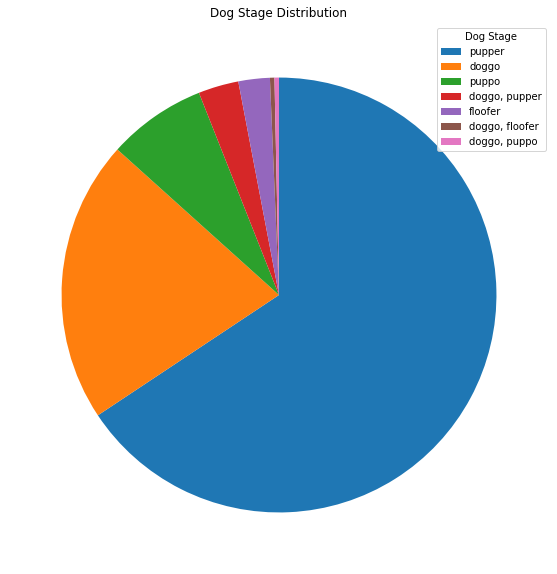

In [53]:
plt.figure(figsize = [10, 10])
sorted_gender = df['dog_stage'].value_counts()
plt.pie(sorted_gender, startangle = 90, counterclock = False);
plt.title('Dog Stage Distribution');
plt.legend(title='Dog Stage', labels = sorted_gender.index)

* Most of the dogs are "Pupper" and "Doggo".

### 2. What is the percintage of the first algorithm detected a dog ?

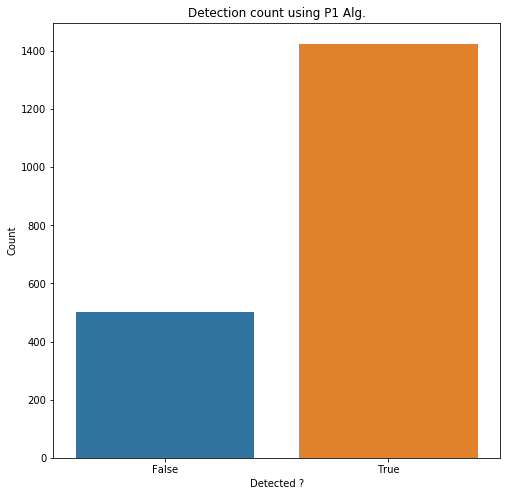

In [54]:
plt.figure(figsize = [8, 8])
sb.countplot(data = df, x = 'p1_dog');
plt.title('Detection count using P1 Alg.');
plt.xlabel('Detected ?');
plt.ylabel('Count');

* From the graph, P1 Algorithm detects dogs about 3 times the undetection.

### 3. What is the distribution of the tweets which became "Quote Status"?

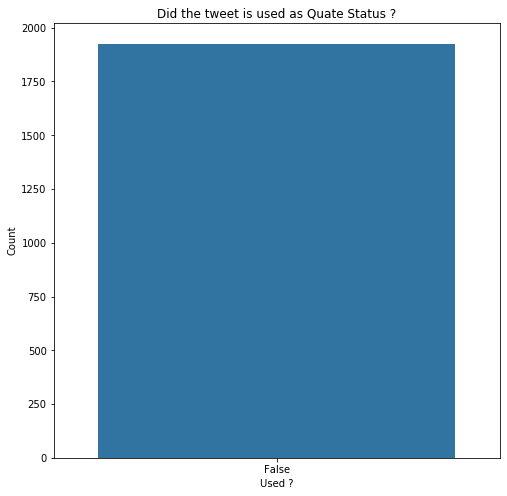

In [55]:
plt.figure(figsize = [8, 8])
sb.countplot(data = df, x = 'is_quote_status');
plt.title('Did the tweet is used as Quate Status ?');
plt.xlabel('Used ?');
plt.ylabel('Count');

* From the chart, no tweet in the dataset was used as quate Status.

## Conclusion (Insights)
* Most of the dogs are "Pupper" and "Doggo".
* From the graph, P1 Algorithm detects dogs about 3 times the undetection.
* From the chart, no tweet in the dataset was used as quate Status.
